Título: Bin Spec

Data: 24/03/2020

Obj: Baseado no output (Voronoi_OutPut.txt) do Voroi Binning (código Voronoi Binning), este código irá somar os spaxels adjacentes para que cada bin tenh o SNR próximo de 20.

Autor: Carlos Roberto

In [1]:
import numpy as np
from mpdaf.obj import Spectrum
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.io import fits

data_folder = "/home/carlos/Desktop/pPXF(SDP)/Final/"

In [2]:
vorbin = np.loadtxt('Voronoi_OutPut.txt') #Abre a tabela que contém os spaxels que devem ser binnados

#Para cada bin ele varre toda a tabela acima procurando pelos espectros relacionados à aquele bin. Se encontra
    #um espectro relacionado ao binNum ele soma ao anteriores que possuem o mesmo binNum
    
for binNum in range(int(vorbin[:,2].max())+1):
    count = 0 #Apenas para ver se está sendo somada a quantidade de espectros correta em cada bin
    empty = Spectrum(data_folder+'Data/Spec/%dx%d.fits'%(0,0)) #Abre um espectro para que possa ser usado de molde
    
    empty.data[:] = 0
    empty.var[:] = 0
    
    for n in range(len(vorbin)):
        
        if vorbin[n][2] == binNum: #Verifica o binNum
            x = np.int(vorbin[n][1]) #Posição x do espectro que será somado
            y = np.int(vorbin[n][0]) #Posição y do espectro que será somado
            
            spec = Spectrum(data_folder+'Data/Spec/%dx%d.fits'%(y,x)) #Abre o espectro que será somado
            
            empty.data = empty.data + spec.data
            empty.var = empty.var + spec.var

            count += 1 #Soma 1 se um espectro foi somado
    print('Número do Bin: %d'%binNum) #Informa qual o binNum foi somado
    print('Número de espectros somados: %d'%count) #Informa quantos espectros foram somados
    
    empty.write(data_folder+"Data/Binned_Spec/Bin%d.fits"%binNum)
    
    print('\n ############################################################## \n')
    

Número do Bin: 0
Número de espectros somados: 2

 ############################################################## 



Número do Bin: 1
Número de espectros somados: 9

 ############################################################## 



Número do Bin: 2
Número de espectros somados: 7

 ############################################################## 



Número do Bin: 3
Número de espectros somados: 5

 ############################################################## 



Número do Bin: 4
Número de espectros somados: 25

 ############################################################## 



Número do Bin: 5
Número de espectros somados: 28

 ############################################################## 



Número do Bin: 6
Número de espectros somados: 11

 ############################################################## 



Número do Bin: 7
Número de espectros somados: 36

 ############################################################## 



Número do Bin: 8
Número de espectros somados: 9

 ############################################################## 



Número do Bin: 9
Número de espectros somados: 2

 ############################################################## 



Número do Bin: 10
Número de espectros somados: 12

 ############################################################## 



Número do Bin: 11
Número de espectros somados: 32

 ############################################################## 



Número do Bin: 12
Número de espectros somados: 8

 ############################################################## 



Número do Bin: 13
Número de espectros somados: 10

 ############################################################## 



Número do Bin: 14
Número de espectros somados: 27

 ############################################################## 



Número do Bin: 15
Número de espectros somados: 33

 ############################################################## 



Número do Bin: 16
Número de espectros somados: 27

 ############################################################## 



In [ ]:
vorbin = np.loadtxt('/home/carlos/Desktop/pPXF(SDP)/Final/Codes/Voronoi (copy)/Voronoi_OutPut.txt') #Abre a tabela que contém os spaxels que devem ser binnados


count = 0
for n in range(len(vorbin)):

    if vorbin[n][2] == 7: #Verifica o binNum
        x = np.int(vorbin[n][1]) #Posição x do espectro que será somado
        y = np.int(vorbin[n][0]) #Posição y do espectro que será somado

        spec = Spectrum(data_folder+'Data/Spec/%dx%d.fits'%(y,x)) #Abre o espectro que será somado
        count+=1
        fig = plt.figure()        
        spec.plot()
        plt.title("%d ,%d"%(y,x))
        fig.set_size_inches(18.5, 10.5)
        plt.show()
        
print('Número de espectros somados: %d'%count) #Informa quantos espectros foram somados


In [2]:
spec0  = Spectrum("/home/carlos/Desktop/pPXF(SDP)/Final/Data/Binned_Spec/Bin0.fits") #Abre o espectro que será somado
spec15 = Spectrum("/home/carlos/Desktop/pPXF(SDP)/Final/Data/Binned_Spec/Bin15.fits") #Abre o espectro que será somado
spec10  = Spectrum("/home/carlos/Desktop/pPXF(SDP)/Final/Data/Binned_Spec/Bin10.fits") #Abre o espectro que será somado
spec14  = Spectrum("/home/carlos/Desktop/pPXF(SDP)/Final/Data/Binned_Spec/Bin14.fits") #Abre o espectro que será somado


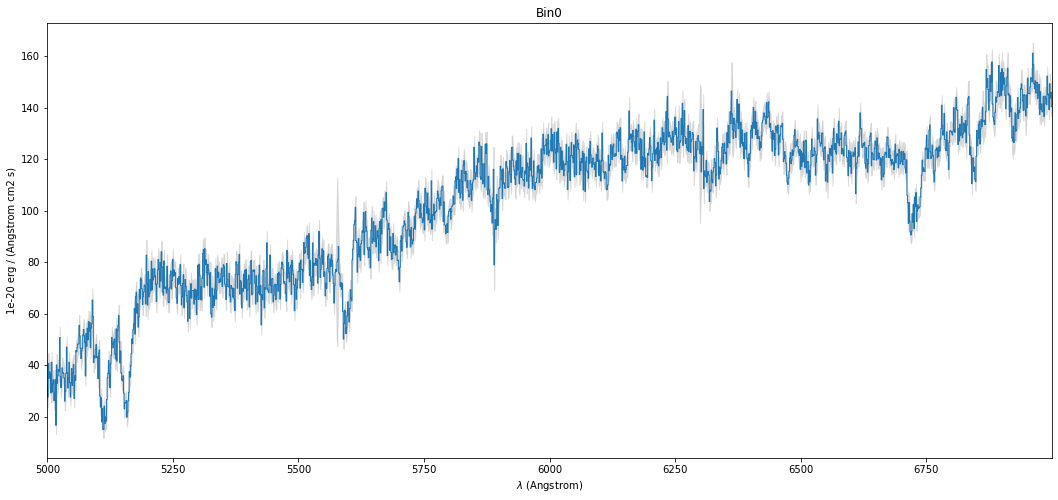

In [68]:
plt.figure(figsize=(18, 8))
spec0.plot(noise=True, title="Bin0")

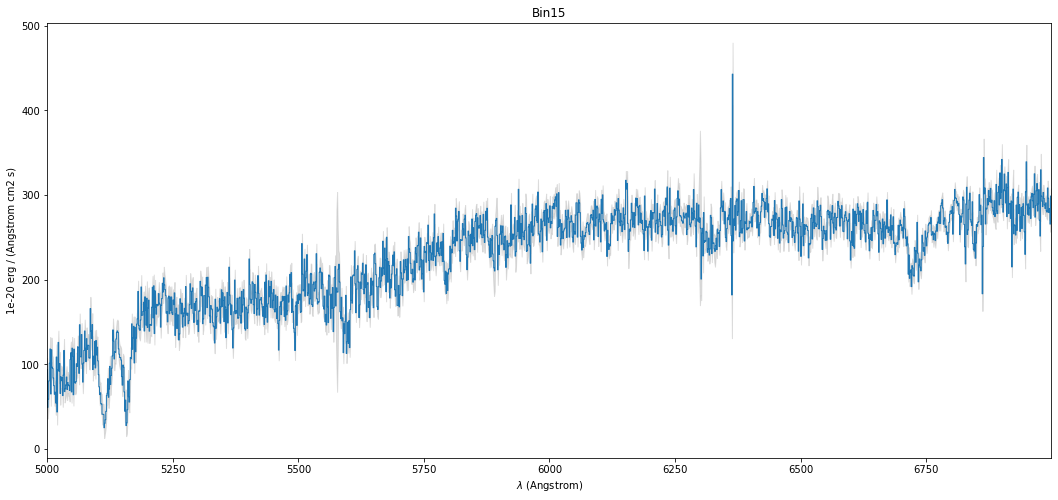

In [69]:
plt.figure(figsize=(18, 8))

spec15.plot(noise=True, title="Bin15")

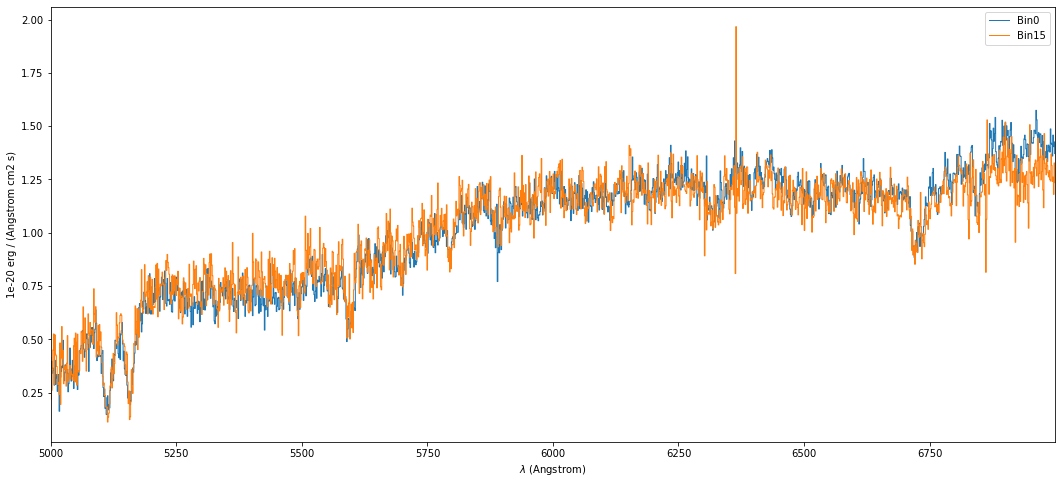

In [81]:
plt.figure(figsize=(18, 8))

(spec0/np.mean(spec0.data.data)).plot(label="Bin0")
(spec15/np.mean(spec15.data.data)).plot(label="Bin15")
plt.legend()

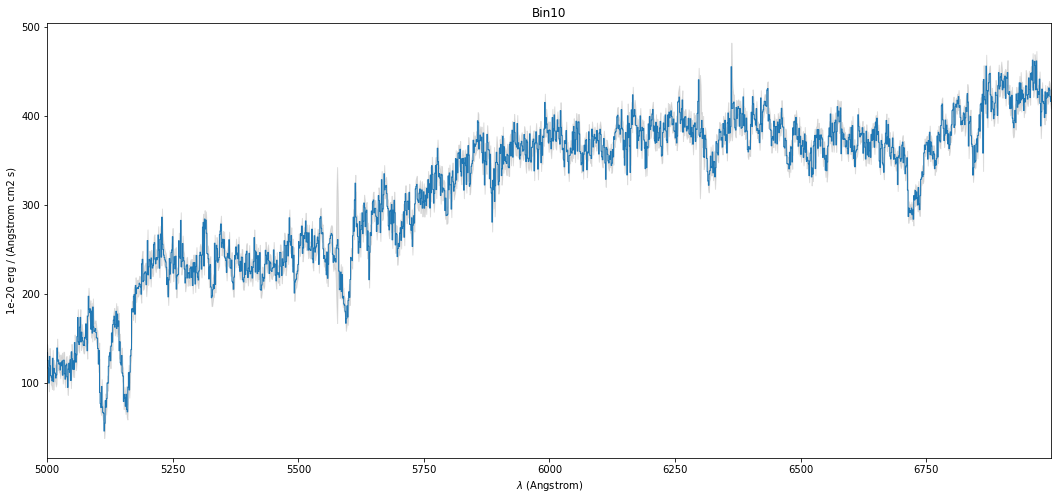

In [70]:
plt.figure(figsize=(18, 8))

spec10.plot(noise=True, title="Bin10")

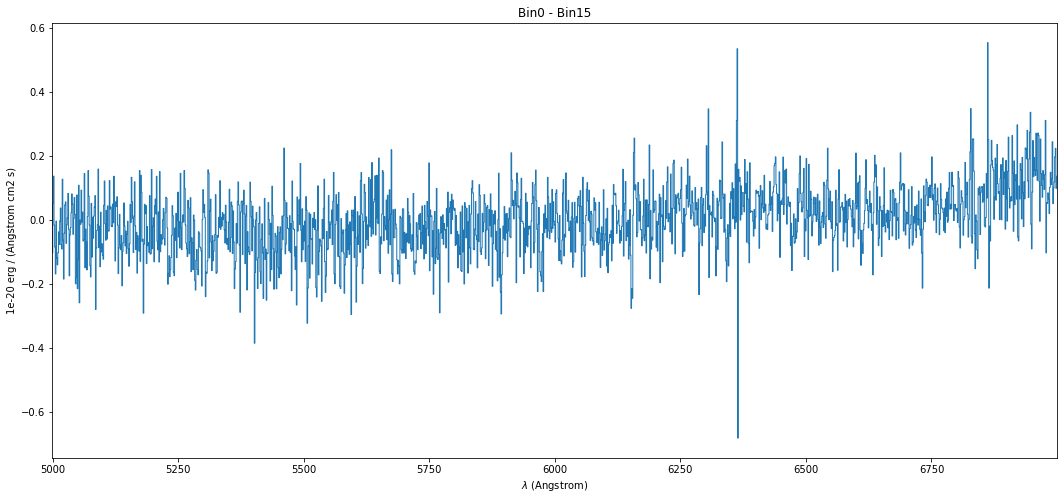

In [71]:
plt.figure(figsize=(18, 8))

(spec0/np.mean(spec0.data.data)-spec15/np.mean(spec15.data.data)).plot(title="Bin0 - Bin15")

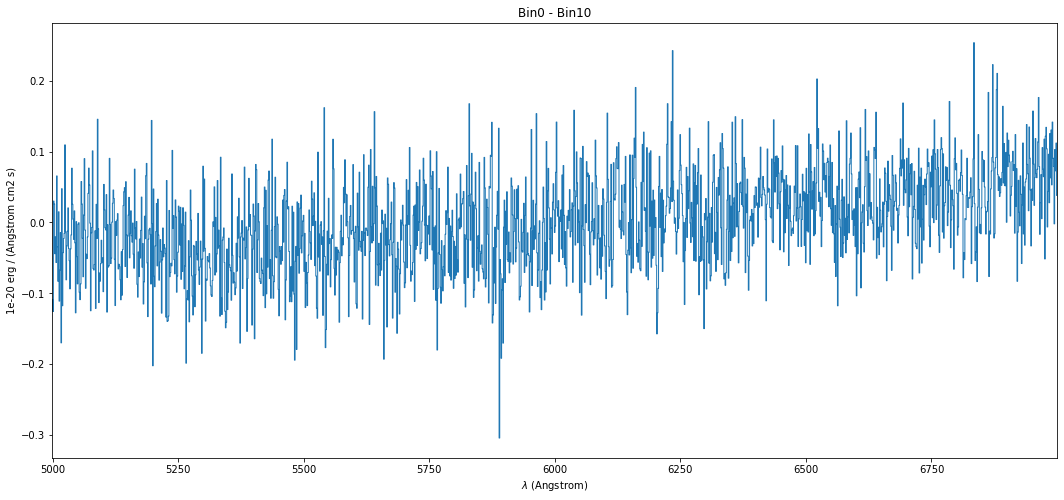

In [3]:
plt.figure(figsize=(18, 8))

(spec0/np.mean(spec0.data.data)-spec10/np.mean(spec10.data.data)).plot(title="Bin0 - Bin10")

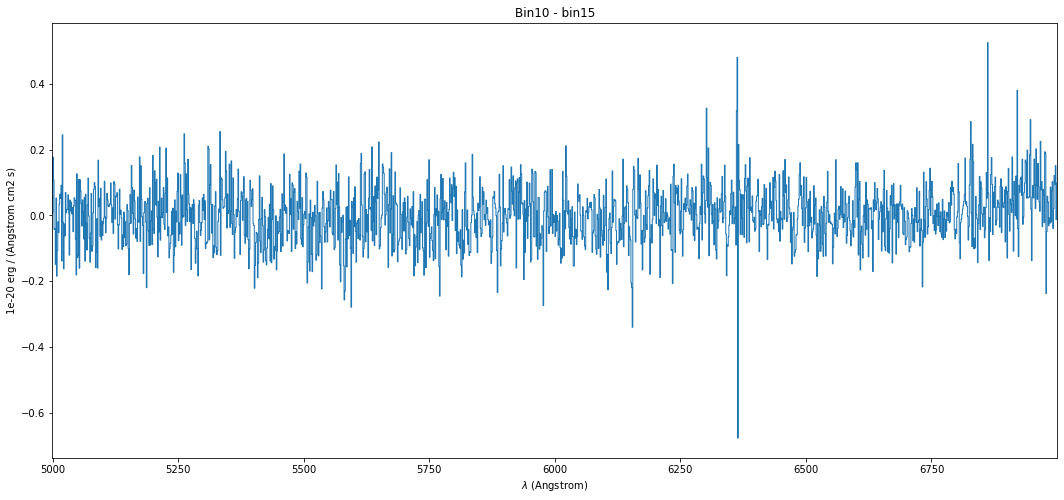

In [72]:
plt.figure(figsize=(18, 8))

(spec10/np.mean(spec10.data.data)-spec15/np.mean(spec15.data.data)).plot(title="Bin10 - bin15")

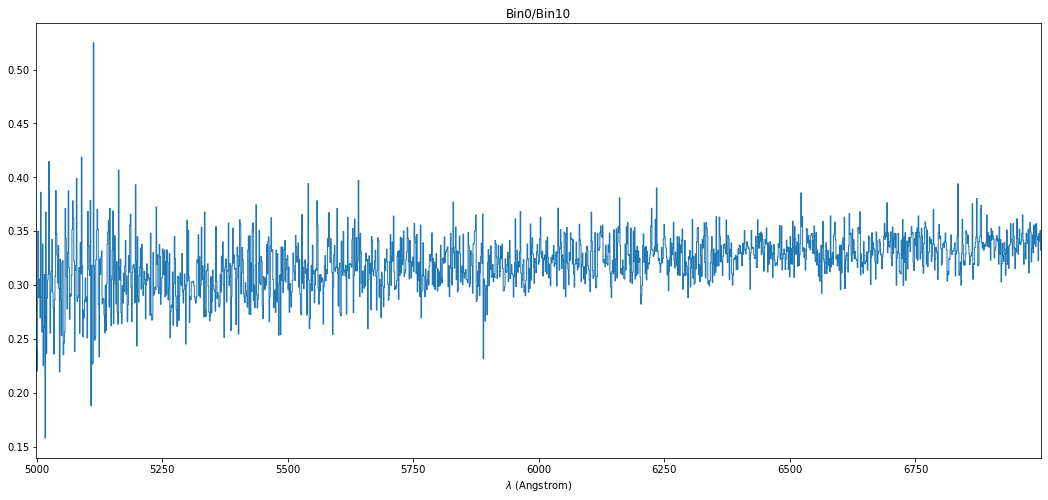

In [4]:
plt.figure(figsize=(18, 8))

(spec0/spec10).plot(title="Bin0/Bin10")

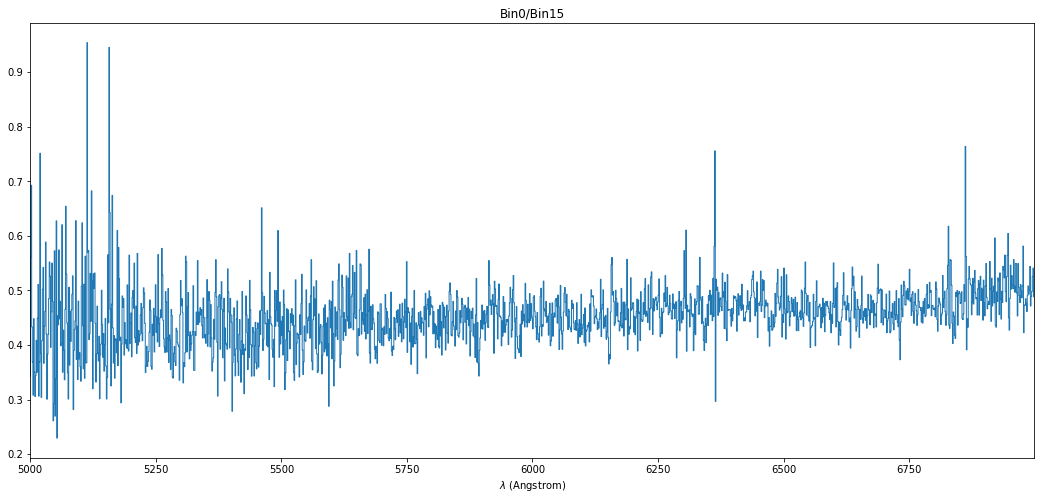

In [7]:
plt.figure(figsize=(18, 8))
(spec0/spec15).plot(title="Bin0/Bin15")

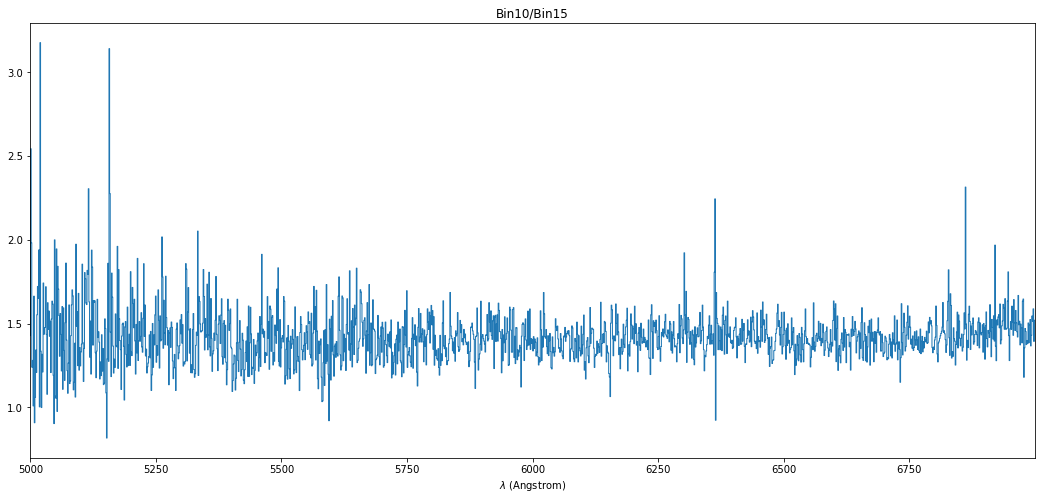

In [4]:
plt.figure(figsize=(18, 8))
(spec10/spec15).plot(title="Bin10/Bin15")

In [53]:
spec15  = Spectrum("/home/carlos/Desktop/pPXF(SDP)/Final/Data/Binned_Spec/Bin15.fits") #Abre o espectro que será somado

badspec1 = Spectrum("/home/carlos/Desktop/pPXF(SDP)/Final/Data/Spec/24x25.fits")
badspec2 = Spectrum("/home/carlos/Desktop/pPXF(SDP)/Final/Data/Spec/24x26.fits")
badspec3 = Spectrum("/home/carlos/Desktop/pPXF(SDP)/Final/Data/Spec/24x24.fits")
badspec4 = Spectrum("/home/carlos/Desktop/pPXF(SDP)/Final/Data/Spec/25x25.fits")
badspec5 = Spectrum("/home/carlos/Desktop/pPXF(SDP)/Final/Data/Spec/23x25.fits")

test = Spectrum("/home/carlos/Desktop/pPXF(SDP)/Final/Data/Spec/26x25.fits")

(232.91060893721215, 0.27810801137301194)

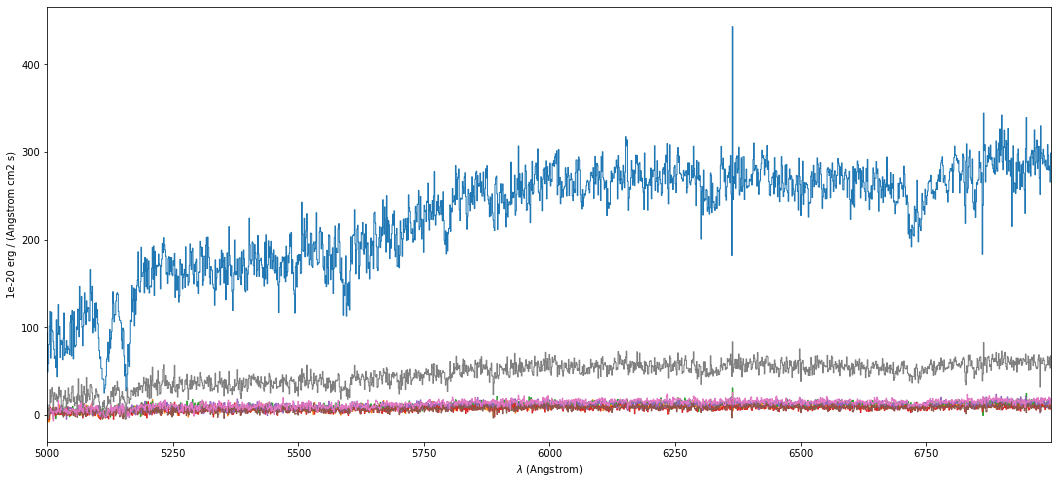

In [54]:
plt.figure(figsize=(18, 8))

spec15.plot()
badspec1.plot()
badspec2.plot()
badspec3.plot()
badspec4.plot()
badspec5.plot()

test.plot()
soma = badspec1+badspec2+badspec3+badspec4+badspec5
soma.plot()
spec15.mean()

In [58]:
test.mean()[0]/np.sqrt(test.var.data).mean()


5.927075468289191

In [50]:
spec15.data   = spec15.data.data - soma.data.data
spec15.var    = spec15.var.data - (badspec1.var.data+badspec2.var.data+badspec3.var.data+badspec4.var.data+badspec5.var.data)

(183.97871035458584, 0.25252721859028837)

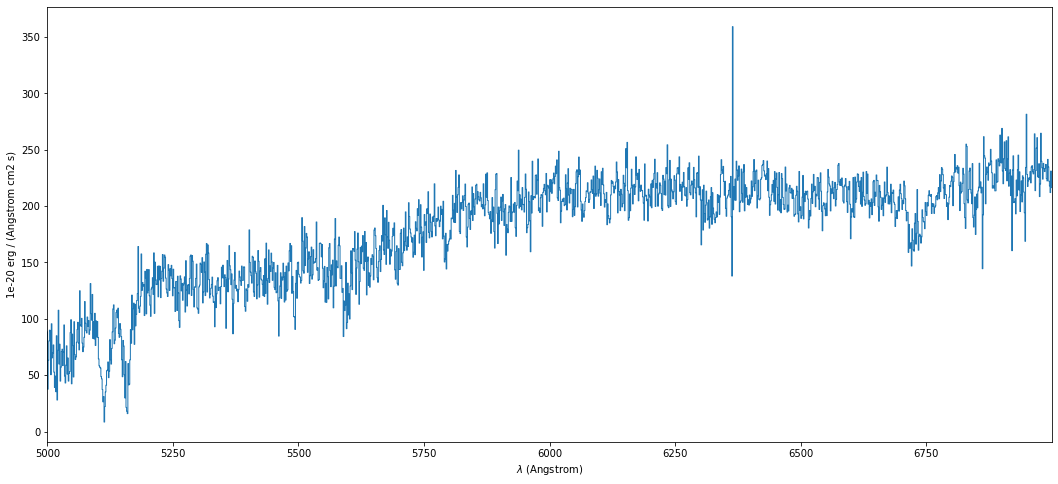

In [51]:
plt.figure(figsize=(18, 8))
spec15.plot()
spec15.mean()

In [52]:
spec15.write("/home/carlos/Desktop/Bin15_removed.fits")

In [59]:
badspec1.mean()[0]/np.sqrt(badspec1.var.data).mean()


4.2866832230558245

In [60]:
badspec1 = Spectrum("/home/carlos/Desktop/pPXF(SDP)/Final/Data/Spec/21x27.fits")
badspec2 = Spectrum("/home/carlos/Desktop/pPXF(SDP)/Final/Data/Spec/20x27.fits")
badspec3 = Spectrum("/home/carlos/Desktop/pPXF(SDP)/Final/Data/Spec/20x26.fits")
badspec4 = Spectrum("/home/carlos/Desktop/pPXF(SDP)/Final/Data/Spec/20x25.fits")
badspec5 = Spectrum("/home/carlos/Desktop/pPXF(SDP)/Final/Data/Spec/21x25.fits")
badspec6 = Spectrum("/home/carlos/Desktop/pPXF(SDP)/Final/Data/Spec/21x27.fits")
badspec7 = Spectrum("/home/carlos/Desktop/pPXF(SDP)/Final/Data/Spec/22x24.fits")
badspec8 = Spectrum("/home/carlos/Desktop/pPXF(SDP)/Final/Data/Spec/22x25.fits")


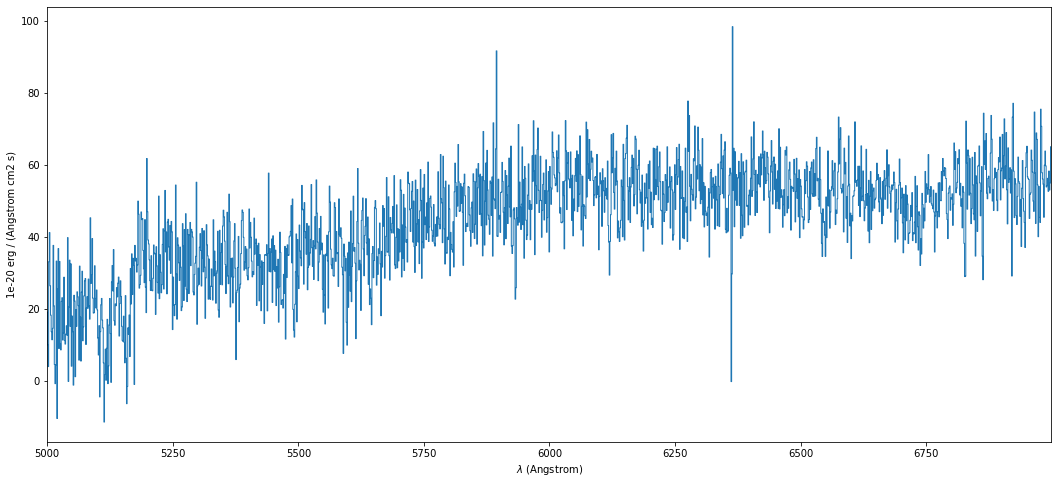

In [62]:
soma =  badspec1+badspec2+badspec3+badspec4+badspec5+badspec6+badspec7+badspec8
plt.figure(figsize=(18, 8))

soma.plot()

In [63]:
soma.var = (badspec1.var+badspec2.var+badspec3.var+badspec4.var+badspec5.var+badspec6.var+badspec7.var+badspec8.var)

In [67]:
soma.data.data.mean()/np.sqrt(soma.var.data).mean()

7.018758062185083

In [68]:
soma.write("/home/carlos/Desktop/soma.fits")

(232.91060893721215, 0.27810801137301194)

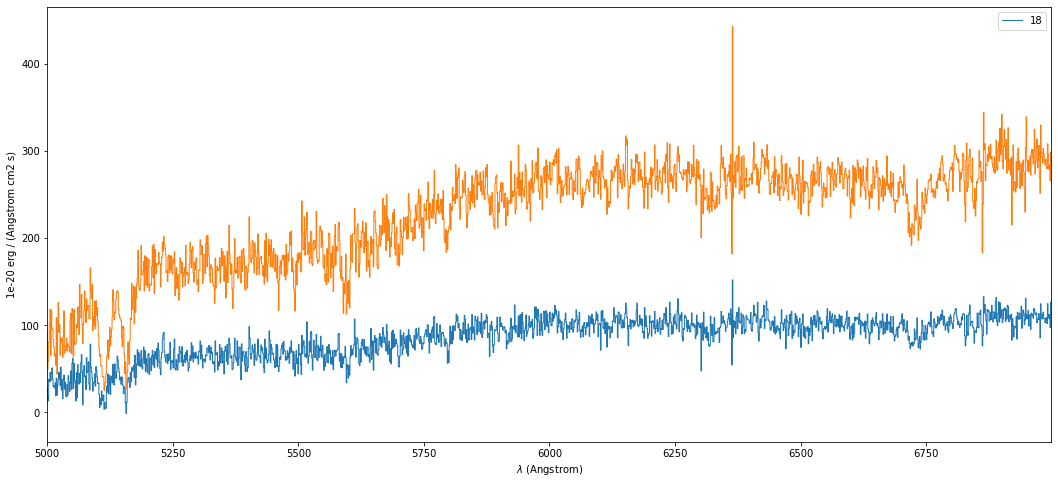

In [104]:
plt.figure(figsize=(18, 8))

bin18 = Spectrum("/home/carlos/Desktop/pPXF(SDP)/Data/Voronoi10/Binned_Spec/Bin18.fits")
spec15  = Spectrum("/home/carlos/Desktop/pPXF(SDP)/Final/Data/Binned_Spec/Bin15.fits") #Abre o espectro que será somado

bin18.plot(label="18")
spec15.plot()
plt.legend()

spec15.mean()

In [105]:
spec15.data   = spec15.data.data - bin18.data.data[:spec15.data.data.size]
spec15.var    = abs(spec15.var.data - bin18.var.data[:spec15.data.data.size])

In [103]:
spec15.mean()[0]/np.sqrt(abs(spec15.var.data)).mean()

15.674732740310795

In [106]:
spec15.write("/home/carlos/Desktop/test.fits")

In [91]:
np.sqrt(bin18.var.data[:spec15.data.data.size])

array([ 9.96437173, 10.33609362, 10.18503845, ...,  5.00794276,
        5.15026379,  5.14213786])

In [82]:
bin18.data.data[:spec15.data.data.size]

1601